In [1]:
Sys.setenv("R_MAX_VSIZE" = 16e12)
memory.limit(size=16e12)
### Set working directory:
setwd("G:\\My Drive\\SDM_China")
#setwd("/export/home/mk843/mnt/")
### Load libraries
library(rstan)
library(rgdal)
library("bayesplot")
library("ggplot2")
library('grid') # For plotting with ggplot and grid
library('rethinking') # use this for the link function and generating predictions
library("maptools")
library("rgdal")
library("tidyr")
library("dplyr")
library("ggpubr")
library("cowplot")

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.

Loading required package: sp

rgdal: version: 1.4-8, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/ycrnm/Documents/R/win-library/3.5/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/ycrnm/Documents/R/win-library/3.5/rgdal/proj
 Linking to sp versi

In [2]:
mname<-'parabolic_simple_iCAR'
path2means<-paste('outputs/07_01_Future_means_',mname,".png",sep="")

In [ ]:
china<-readOGR(dsn = "data/china_predictions", layer = "china_predictions")

In [ ]:
Sys.setenv("R_MAX_VSIZE" = 16e12)
memory.limit(size=16e12)

### Present:

In [ ]:
memory.limit()

In [43]:
memory.limit(size=64000)

[1] 64000

In [33]:
# add to data a new column termed "id" composed of the rownames of data
china@data$id <- rownames(china@data)
# create a data.frame from our spatial object
predDF <- fortify(china, region = "id")

In [34]:
subsets<-subset(colnames(china@data),lapply(colnames(china@data), grepl,pattern="log")==TRUE | 
       lapply(colnames(china@data), grepl,pattern="%")==TRUE |
       lapply(colnames(china@data), grepl,pattern="mean")==TRUE 
      )

In [35]:
subsets<-subset(colnames(china@data),lapply(colnames(china@data), grepl,pattern="mns")==TRUE | 
       lapply(colnames(china@data), grepl,pattern="X")==TRUE 
      )

In [40]:
s1<-c("logArea","mns_pr_","X5._log","X95._log")

In [44]:
categories <- gather(china@data, category, predictions, AreaPr,s1)
predDF1 <- left_join(predDF, categories, by = "id")

ERROR: Error: Evaluation error: cannot allocate vector of size 33.8 Mb.


In [ ]:
saved <- options(repr.plot.width=7.25, repr.plot.height=5)
saved$repr.plot.width <- 7.25
saved$repr.plot.height<-5
posterior_pred<-ggplot(subset(predDF1, predictions %in% c("logArea","mns_pr_","X5._log","X95.log")), aes(x = long, y = lat,group=group,fill=predictions)) + 
geom_polygon(aes(x = long, y = lat))+
facet_wrap(~category)+
scale_fill_gradient(low = "lightyellow", high = "red")+
coord_equal()+
theme(
  panel.background = element_rect(fill = NA),
  panel.grid.major = element_line(colour = "lightgrey"),
)
posterior_pred

# Future manual:

In [4]:
# add to data a new column termed "id" composed of the rownames of data
china@data$id <- rownames(china@data)
# create a data.frame from our spatial object
predDF <- fortify(china, region = "id")

In [7]:
colnames(china@data)

[1] "ID_0"     "ISO"      "NAME_"    "ID_1"     "NAME_1"   "ID_2"    
  [7] "NAME_2"   "ID_3"     "NAME_3"   "TYPE_3"   "ENGTYPE"  "NL_NAME" 
 [13] "VARNAME"  "BIO1"     "BIO17"    "BIO4"     "BIO9"     "npp"     
 [19] "BIO10_1"  "BIO10_2"  "BIO10_3"  "BIO10_4"  "BIO10_5"  "BIO10_6" 
 [25] "BIO17_1"  "BIO17_2"  "BIO17_3"  "BIO17_4"  "BIO17_5"  "BIO17_6" 
 [31] "BIO4_1"   "BIO4_2"   "BIO4_3"   "BIO4_4"   "BIO4_5"   "BIO4_6"  
 [37] "BIO9_1"   "BIO9_2"   "BIO9_3"   "BIO9_4"   "BIO9_5"   "BIO9_6"  
 [43] "npp_1"    "npp_2"    "npp_3"    "npp_4"    "npp_5"    "npp_6"   
 [49] "BIO4_sd"  "BIO4_1_"  "BIO4_2_"  "BIO4_3_"  "BIO4_4_"  "BIO4_5_" 
 [55] "BIO4_6_"  "BIO9_sd"  "BIO9_1_"  "BIO9_2_"  "BIO9_3_"  "BIO9_4_" 
 [61] "BIO9_5_"  "BIO9_6_"  "BIO10_s"  "BIO10_1_" "BIO10_2_" "BIO10_3_"
 [67] "BIO10_4_" "BIO10_5_" "BIO10_6_" "BIO17_s"  "BIO17_1_" "BIO17_2_"
 [73] "BIO17_3_" "BIO17_4_" "BIO17_5_" "BIO17_6_" "npp_sd"   "npp_1_s" 
 [79] "npp_2_s"  "npp_3_s"  "npp_4_s"  "npp_5_s"  "npp_6_s"  "AreaDQ"  
 [85] "YieldDQ"  "AreaFr"   "AreaHaS"  "AreaHaM"  "ProdSum"  "ProdMen" 
 [91] "YieldPH"  "area"     "AreaPr"   "ProdHa"   "logArea"  "logProd" 
 [97] "X5._log"  "X95._log" "mns_pr_"  "X5."      "X95."     "mns_prd" 
[103] "X5._1k_l" "X95._1k_" "mns__1_"  "X5._1k"   "X95._1k"  "mns_p_1" 
[109] "X5._2k_l" "X95._2k_" "mns__2_"  "X5._2k"   "X95._2k"  "mns_p_2" 
[115] "X5._3k_l" "X95._3k_" "mns__3_"  "X5._3k"   "X95._3k"  "mns_p_3" 
[121] "X5._4k_l" "X95._4k_" "mns__4_"  "X5._4k"   "X95._4k"  "mns_p_4" 
[127] "X5._5k_l" "X95._5k_" "mns__5_"  "X5._5k"   "X95._5k"  "mns_p_5" 
[133] "X5._6k_l" "X95._6k_" "mns__6_"  "X5._6k"   "X95._6k"  "mns_p_6" 
[139] "id"

In [9]:
# gather data by category
categories <- gather(china@data, category, predictions, 'mns__1_','mns__2_','mns__3_',
                     'mns__4_','mns__5_','mns__6_')
# merge the "fortified" data with the data from our spatial object
predDF <- left_join(predDF, categories, by = "id")

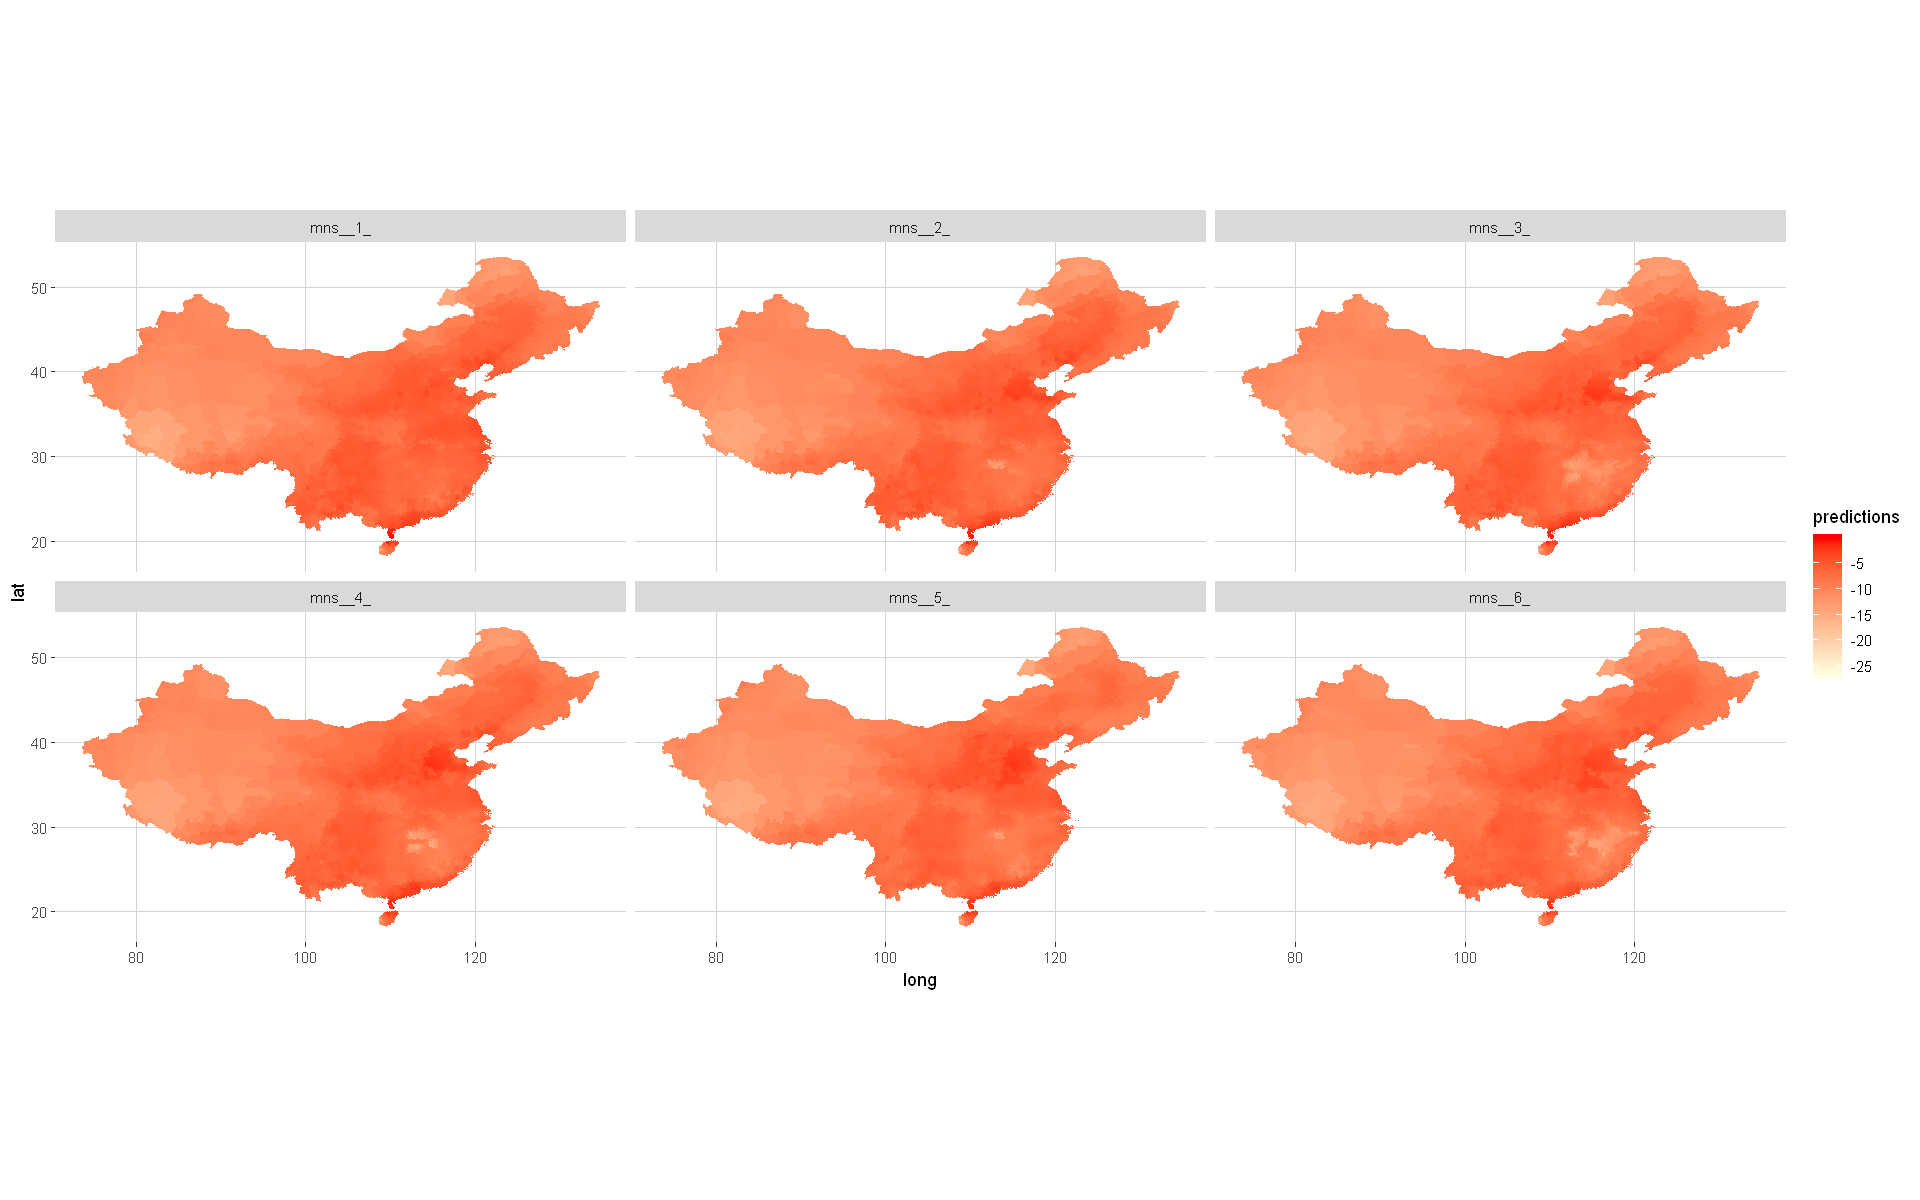

In [12]:
saved <- options(repr.plot.width=16, repr.plot.height=10)
saved$repr.plot.width <- 16
saved$repr.plot.height<-10
posterior_pred<-ggplot(predDF, aes(x = long, y = lat,group=group,fill=predictions)) + 
geom_polygon(aes(x = long, y = lat))+
facet_wrap(~category)+
scale_fill_gradient(low = "lightyellow", high = "red")+
coord_equal()+
theme(
  panel.background = element_rect(fill = NA),
  panel.grid.major = element_line(colour = "lightgrey"),
)
posterior_pred

In [16]:
ggsave(path2means,posterior_pred,width = saved$repr.plot.width, height = saved$repr.plot.height, units = "in",device='png')